In [9]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [2]:
# a binary image (threshold at 128)
img = np.array(Image.open(r"C:\Users\Joey_\Google 雲端硬碟\資工所\博士班\電腦視覺\Homework\Homework2\lena.bmp"))

for i in range(0, 512):
    for j in range(0, 512):
        if (img[i][j] < 128):
            img[i][j] = 0
        else: 
            img[i][j] = 255
out_img = Image.fromarray(img)
out_img.save("binary.bmp")
out_img.show()


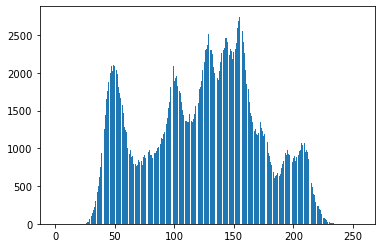

In [8]:
# a histogram
img = np.array(Image.open(r"C:\Users\Joey_\Google 雲端硬碟\資工所\博士班\電腦視覺\Homework\Homework2\lena.bmp"))
x = np.arange(256)
y = np.zeros(256)
for i in range(0, 512):
    for j in range(0, 512):
        y[img[i][j]] +=1
plt.bar(x,y)
plt.show()

In [25]:
# (c) connected components(regions with + at centroid, bounding box)
# 4-connected

# Define threshold of area 
areaThreshold = 500

# Load image from file
original = Image.open('lena.bmp')
binary = Image.open('binary.bmp')

# Get width and Height
width, height = original.size

# Setup parameter
areaID = 1
visited = np.zeros((width, height))
IDnumber = np.zeros(width*height)
labelImage = np.zeros((width, height))

# using BFS in each pixel to get connected component
for c in range(width):
    for r in range(height):
        # if the pixel == 0, we don't need to label, so just marks visited
        if (binary.getpixel((c, r)) == 0):
            visited[c, r] = 1
        elif (visited[c,r] ==0):
            stack = Stack()
            stack.push((c, r))
            
            while not stack.isEmpty():
                
                col, row = stack.pop()
                
                if (visited[col, row] == 0):
                    
                    visited[col, row] = 1
                    labelImage[col, row] = areaID
                    IDnumber[areaID] += 1
                    
                    for (x, y) in [(col-1, row), (col+1, row), (col, row+1),(col, row-1)]:
                        if (0 <= x < width and 0 <= y < height):
                            if (binary.getpixel((x,y))!=0 and visited[x,y] == 0):
                                stack.push((x,y))
            areaID += 1
            
rect = Stack()

for i in range(IDnumber.size):
    if (IDnumber[i] > areaThreshold):
        rectLeft = width
        rectRight = 0
        rectTop = height
        rectBot = 0
        for c in range(width):
            for r in range(height):
                if (labelImage[c, r] == i):
                    rectLeft = min(c, rectLeft)
                    rectRight = max(c, rectRight)
                    rectTop = min(r, rectTop)
                    rectBot = max(r, rectBot)
        rect.push((rectLeft, rectTop, rectRight, rectBot))

connectedImage = Image.new('RGB', original.size)
connectedImageArray = connectedImage.load()                   

for c in range(width):
    for r in range(height):
        if (binary.getpixel((c,r)) == 0):
            connectedImageArray[c, r] = (0, 0, 0)
        else:
            connectedImageArray[c, r] = (255, 255, 255)
while not rect.isEmpty():
    rectLeft, rectTop, rectRight, rectBot = rect.pop()
    rectCenterX = (rectLeft + rectRight)/2
    rectCenterY = (rectTop + rectBot)/2
    draw = ImageDraw.Draw(connectedImage)
    draw.rectangle(((rectLeft, rectTop), (rectRight, rectBot)), outline = 'red')
    draw.line(((rectCenterX+5, rectCenterY),(rectCenterX-5, rectCenterY)),fill = 'red',width = 5)
    draw.line(((rectCenterX,rectCenterY+5),(rectCenterX,rectCenterY-5)), fill = 'red', width = 5)
connectedImage.save("Connected Lena.bmp")
connectedImage.show()
      